In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

In [5]:
sales = pd.read_csv("C:/Users/yoosha/Downloads/SalesData.csv")

In [6]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [85]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)



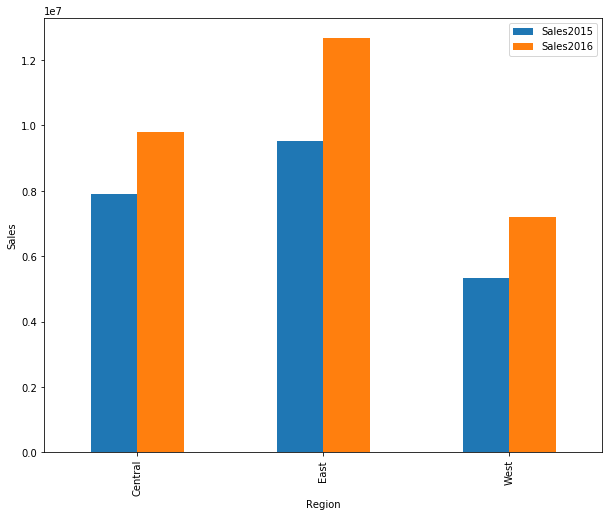

In [195]:
sales1 = sales.groupby('Region')[['Sales2015' , 'Sales2016']].sum()
sales1graph = sales1.plot.bar(figsize = (10,8))
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()                              

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000D7362E5D30>],
      dtype=object)

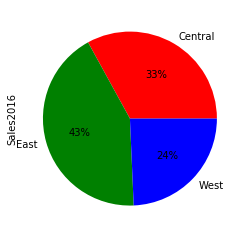

In [196]:
sales2 = sales.groupby('Region')['Sales2016'].sum()
sales2.plot(kind='pie',
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%',
            fontsize=10, 
            subplots='true')


### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [ ]:
sales3 = sales.groupby([]).aggregate({})

sales3graph=sales3.plot.bar(figsize=(18,6))

Text(0, 0.5, 'Sales')

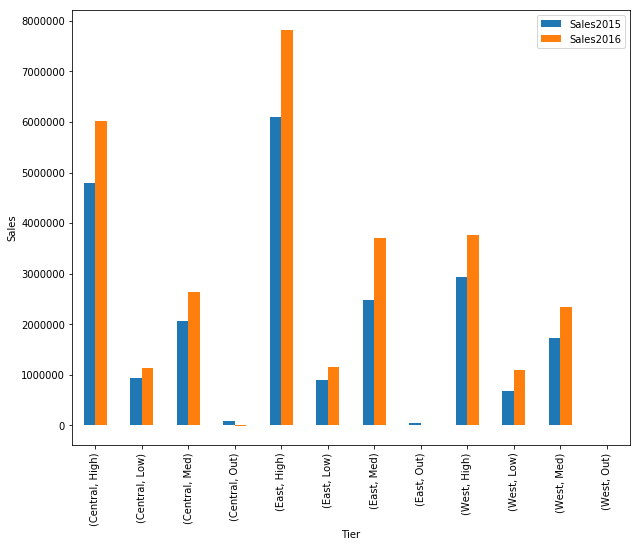

In [197]:
sales3 = sales.groupby(['Region' , 'Tier'])[['Sales2015' , 'Sales2016']].sum()
sales3graph = sales3.plot.bar(figsize = (10,8))
plt.xlabel('Tier')
plt.ylabel('Sales')

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

Text(0, 0.5, 'Sales')

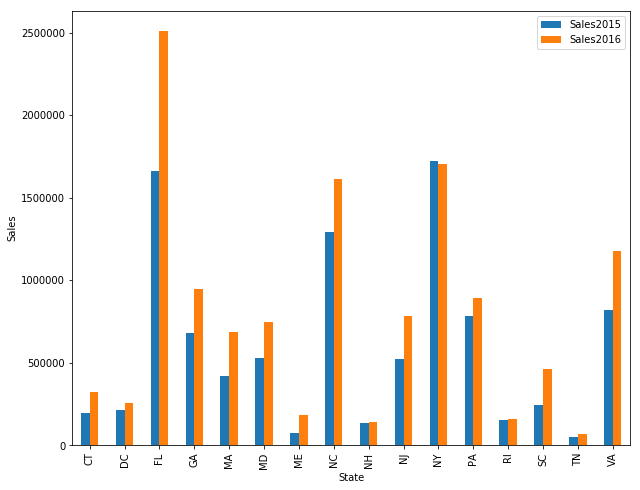

In [198]:
sales4 = sales.loc[sales.Region == 'East'].groupby('State')[['Sales2015' , 'Sales2016']].sum()
sales4graph = sales4.plot.bar(figsize = (10,8))
plt.xlabel('State')
plt.ylabel('Sales')

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

Text(0, 0.5, 'Units')

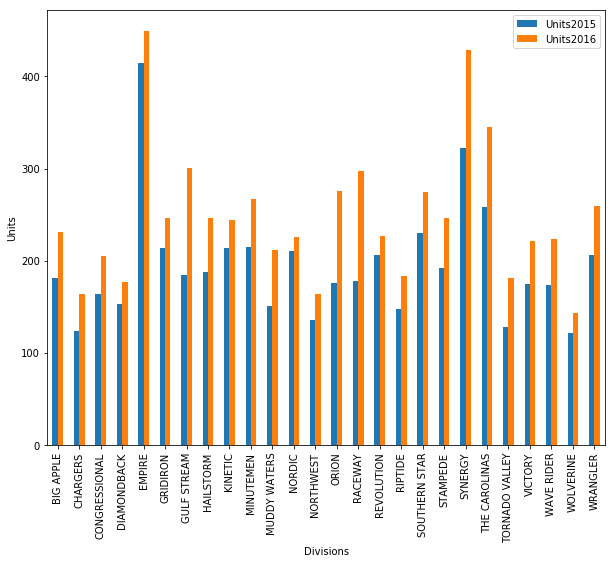

In [199]:
sales5 = sales.loc[sales.Tier == 'High'].groupby('Division')[['Units2015' , 'Units2016']].sum()
sales5graph = sales5.plot.bar(figsize = (10,8))
plt.xlabel('Divisions')
plt.ylabel('Units')

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [21]:
sales['Qtr'] = np.where(((sales.Month == 'Jan')|(sales.Month == 'Feb')|(sales.Month == 'Mar')) , 'Q1',
                        np.where(((sales.Month == 'Apr')|(sales.Month == 'May')|(sales.Month == 'Jun')) , 'Q2' ,
                                np.where(((sales.Month == 'Jul')|(sales.Month == 'Aug')|(sales.Month == 'Sep')) , 'Q3' ,'Q4')))

In [22]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


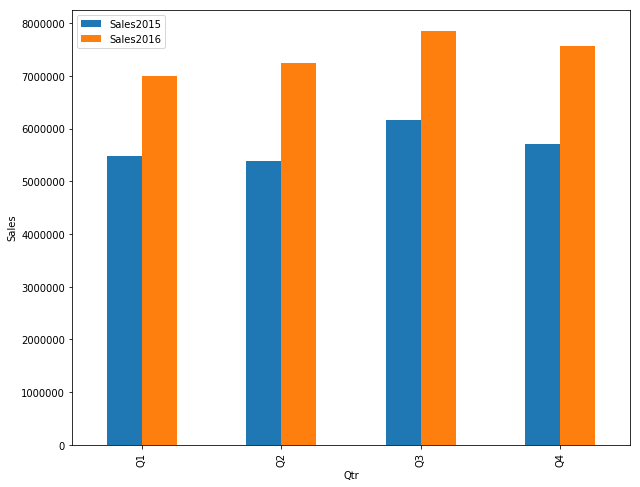

In [23]:
sales1 = sales.groupby('Qtr')[['Sales2015' , 'Sales2016']].sum()
sales1graph = sales1.plot.bar(figsize = (10,8))
plt.xlabel('Qtr')
plt.ylabel('Sales')
plt.show()                              

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [40]:
sales8 = sales[sales.Tier !='Out']
sales8 = sales8.groupby('Qtr')[['Sales2015' , 'Sales2016']].sum()
sales8 = sales8.round(decimals=0)
sales8 = sales8.stack() 
sales8 = sales8.unstack(level=0)
sales8

Qtr,Q1,Q2,Q3,Q4
Sales2015,5473855.0,5359223.0,6111983.0,5675242.0
Sales2016,6997953.0,7237361.0,7864795.0,7567868.0


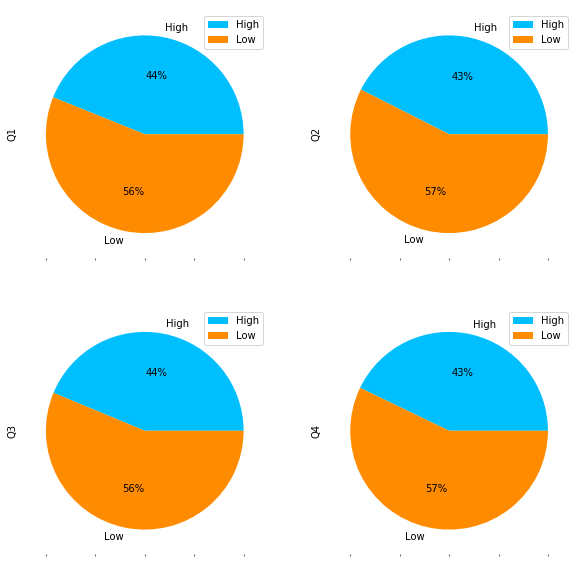

In [46]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange' , 'darkgreen'] ,
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2),
            figsize=(10,10))
plt.show()